In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X=df.drop(columns=['id','CustomerId','Surname','Exited'])
Y=df[['Exited']]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [8]:
Y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [11]:
Y.value_counts()

Exited
0         130113
1          34921
Name: count, dtype: int64

<Axes: xlabel='Exited'>

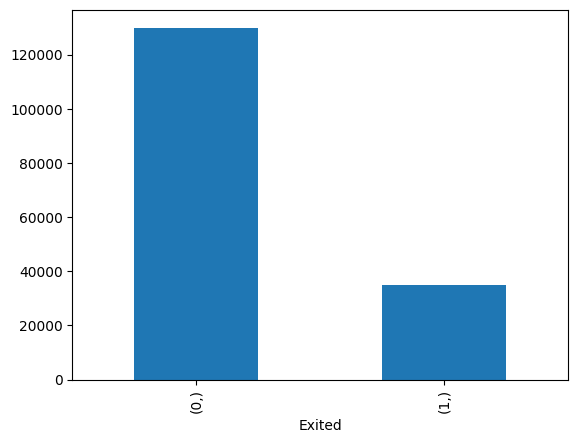

In [12]:
Y.value_counts().plot(kind='bar')

In [13]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Geography', 'Gender']

In [15]:
con

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='median')),
                          ('scalar',StandardScaler())]))

In [18]:
cat_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='most_frequent')),
                          ('ordinal',OrdinalEncoder())]))

In [19]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [20]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scalar', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Geography', 'Gender'])])

In [21]:
X_pre=pre.fit_transform(X)
X_pre.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,2.0,1.0


In [22]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_pre,Y)
mi

array([0.00367317, 0.08337219, 0.00233152, 0.01996669, 0.10150732,
       0.0130151 , 0.03732365, 0.00756572, 0.02680275, 0.02993933])

In [23]:
mi=pd.Series(mi)
mi.index=X_pre.columns
mi

num__CreditScore        0.003673
num__Age                0.083372
num__Tenure             0.002332
num__Balance            0.019967
num__NumOfProducts      0.101507
num__HasCrCard          0.013015
num__IsActiveMember     0.037324
num__EstimatedSalary    0.007566
cat__Geography          0.026803
cat__Gender             0.029939
dtype: float64

In [24]:
mi.sort_values(ascending=False)

num__NumOfProducts      0.101507
num__Age                0.083372
num__IsActiveMember     0.037324
cat__Gender             0.029939
cat__Geography          0.026803
num__Balance            0.019967
num__HasCrCard          0.013015
num__EstimatedSalary    0.007566
num__CreditScore        0.003673
num__Tenure             0.002332
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

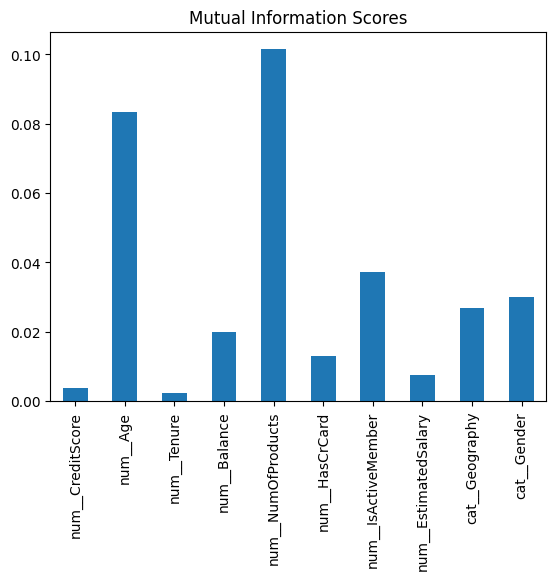

In [25]:
mi.plot(kind='bar',title='Mutual Information Scores')